In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_rows', 100)

__Описание данных__
Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.

__Задание__
    • Выявите формулу дохода в целом и его составных частей
    • Проверьте, что данная формула объясняет доход с точностью до рубля
    • Выявите зависимости между составными частями дохода

__Подгружаем таблицу в пандас, смотрим типы данных, проверяем на пустые данные, смотрим краткое описание__

In [ ]:
pd.read_csv('/home/timur/')

In [3]:
df = pd.read_excel('taske_ 5.0_2nd_ver.xlsx')

In [4]:
df

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000


In [5]:
df.dtypes

FIO                           object
Месяц                 datetime64[ns]
Профессия                     object
Разряд                         int64
Оборудование                  object
Вредность (балл.)              int64
Объем производства             int64
Доход                        float64
dtype: object

In [6]:
df.isna().sum()

FIO                   0
Месяц                 0
Профессия             0
Разряд                0
Оборудование          0
Вредность (балл.)     0
Объем производства    0
Доход                 0
dtype: int64

In [7]:
df.describe()

,Разряд,Вредность (балл.),Объем производства,Доход
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333,21665.570570
std,1.371417,6.567857,230.982220,4686.885527
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,14.750000,805.000000,18076.500000
50%,5.000000,18.000000,985.000000,21057.300000
75%,6.000000,19.000000,1185.000000,25105.764706
max,7.000000,22.000000,1400.000000,36076.764706


In [8]:
df.describe(include=["object"])

,FIO,Профессия,Оборудование
count,2400,2400,2400
unique,200,9,9
top,Абрамов Е. Д.,Вальцовщик,Пилигримовые станы
freq,12,612,708


### Генерация новых признаков

__Минимальная зарплата 12180р, сделаем предложение, что она является окладом__

In [9]:
df['Доход'].idxmin()

468

In [10]:
df.loc[468, :]

FIO                             Григорьев А. Т.
Месяц                       2009-01-01 00:00:00
Профессия                               Уборщик
Разряд                                        3
Оборудование          Вспомогательные помещения
Вредность (балл.)                             0
Объем производства                          580
Доход                                   12180.0
Name: 468, dtype: object

In [11]:
df['Оклад'] = 12180

__Сделаем таблицу, в которой выведем зависимость минимального доход(предположительно оклада) от разряда__

In [12]:
df.pivot_table(index='Разряд', columns='Профессия', values='Доход', aggfunc='min').reset_index()

Профессия,Разряд,Вальцовщик,Контролер качества готовой продукции,Нагревальщик металла,Огнеупорщик,Оператор поста управления,Подручный вальцовщика,Посадчик металла,Резчик горячего металла,Уборщик
0,3,NaN,NaN,NaN,NaN,NaN,15420.0,NaN,NaN,12180.0
1,4,NaN,NaN,18090.0,16110.0,15570.0,17370.0,18090.0,17010.0,NaN
2,5,19630.0,NaN,20350.0,NaN,17830.0,NaN,NaN,NaN,NaN
3,6,22260.0,NaN,22980.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7,25300.0,22060.0,26020.0,NaN,NaN,NaN,NaN,NaN,NaN


__В данной таблицу видно повышение зарплаты относительно предыдущего разряда, сделаем дополнительную колонку
в исходной таблице, в которую занесём суммарную премию за текущий разряд__

In [13]:
df.pivot_table(index='Разряд', columns='Профессия', values='Доход', aggfunc='min').reset_index().diff()

Профессия,Разряд,Вальцовщик,Контролер качества готовой продукции,Нагревальщик металла,Огнеупорщик,Оператор поста управления,Подручный вальцовщика,Посадчик металла,Резчик горячего металла,Уборщик
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN
2,1.0,NaN,NaN,2260.0,NaN,2260.0,NaN,NaN,NaN,NaN
3,1.0,2630.0,NaN,2630.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,3040.0,NaN,3040.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
доход_за_разряд = pd.DataFrame({'Разряд' : range(3, 8), 
                             'доход_за_разряд' : [0 , 1950.0, 2260.0 + 1950.0, 
                                          2260.0 + 1950.0 + 2630.0, 2260.0 + 1950.0 + 2630.0 + 3040.0]})

In [15]:
df = df.merge(доход_за_разряд, how='left', on='Разряд')

In [16]:
df['доход_без_разряда'] = df['Доход'] - df['доход_за_разряд']

__Посмотрим как меняется переменная вредность в зависимости от профессии__

In [17]:
df.pivot_table(index='Профессия', columns='Вредность (балл.)', values='доход_без_разряда', aggfunc='min') \
.reset_index()

Вредность (балл.),Профессия,0,8,11,16,18,22
0,Вальцовщик,NaN,NaN,NaN,NaN,15420.0,NaN
1,Контролер качества готовой продукции,12180.0,NaN,NaN,NaN,NaN,NaN
2,Нагревальщик металла,NaN,NaN,NaN,NaN,NaN,16140.0
3,Огнеупорщик,NaN,NaN,14160.0,NaN,NaN,NaN
4,Оператор поста управления,NaN,13620.0,NaN,NaN,NaN,NaN
5,Подручный вальцовщика,NaN,NaN,NaN,NaN,15420.0,NaN
6,Посадчик металла,NaN,NaN,NaN,NaN,NaN,16140.0
7,Резчик горячего металла,NaN,NaN,NaN,15060.0,NaN,NaN
8,Уборщик,12180.0,NaN,NaN,NaN,15420.0,NaN


Исход из таблицы мы выяснили, что профессия не влияет на доход, а доплату за каждый балл вредности 180р

In [18]:
df['коэф_вредности'] = 180

In [19]:
df['доход_без_разряда_и_вредности'] = df['доход_без_разряда'] - df['Вредность (балл.)'] * df['коэф_вредности']

__Посмотрим на диаграмму рассеивания зависимости дохода, очищенного от разряда и вредности,  от объёма производства__

Графически видно, что с объёма производства 850 доход увеличивается линейно и это зависит от оборудования.

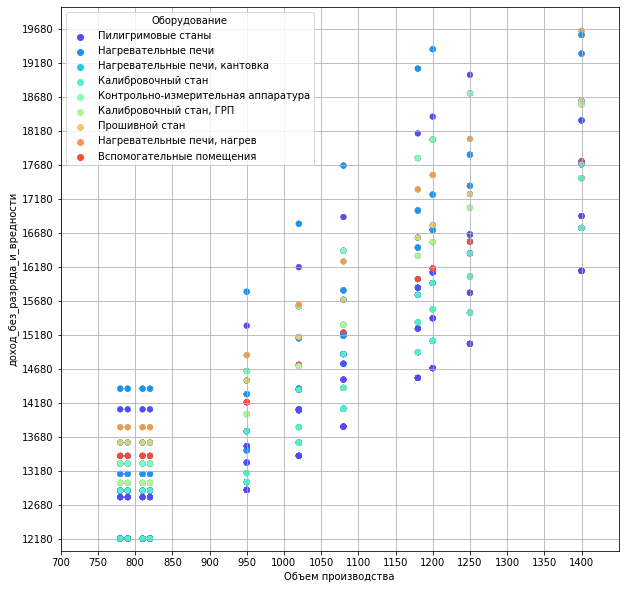

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(np.arange(700, 1450, 50.0))
plt.yticks(np.arange(12180, 20000, 500.0))
plt.xlim(700, 1450)
plt.ylim(12000, 20000)
plt.grid(True)
sns.scatterplot(x="Объем производства", y="доход_без_разряда_и_вредности",
                    hue="Оборудование",
                palette="rainbow",
                linewidth=0,
                data=df, ax=ax);

__Создадим столбец, в котором в отобразим превышения целевого производства__

In [21]:
df['сверхпроизводство'] = 0
df.loc[df['Объем производства'] <= 850 , 'сверхпроизводство'] = 0
df.loc[df['Объем производства'] >= 850 , 'сверхпроизводство'] = df['Объем производства'] - 850

__Теперь посмотрим на оставшееся распределение "очищенных" доходов у разных людей, за определенный месяц__

__Сохраним таблицу с людьми, которые получили неизвестные пока бонусы__

In [22]:
df_unknown_bonuses = df[(df['доход_без_разряда_и_вредности'] > 12181) & (df['Месяц'] == '2009-01-01')]

In [23]:
df_unknown_bonuses.sort_values(by='доход_без_разряда_и_вредности')

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад,доход_за_разряд,доход_без_разряда,коэф_вредности,доход_без_разряда_и_вредности,сверхпроизводство
1800,Семенов И. П.,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
2004,Степанов А. М.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12789.0,12180,0.0,12789.0,180,12789.0,0
1596,Павловский Д. А.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
2304,Чернышев М. В.,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
2112,Усов О. А.,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
1692,Прохоров М. Р.,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
912,Кондратьев Д. Д.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12789.0,12180,0.0,12789.0,180,12789.0,0
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0,12180,0.0,16029.0,180,12789.0,0
2352,Щербаков А. Е.,2009-01-01,Оператор поста управления,4,Калибровочный стан,8,580,16276.5,12180,1950.0,14326.5,180,12886.5,0
924,Константинов П. Г.,2009-01-01,Оператор поста управления,4,Калибровочный стан,8,580,16276.5,12180,1950.0,14326.5,180,12886.5,0


__Похоже, что мы ошиблись с величиной оклада, который является различным, в зависимости от разряда, также видим, что
у некоторых людей есть личные бонусы величиной в 5% или 10% от оклада__

Изменим величину оклада и обозначим в нашей исходной таблице личную прибавку в виде процентов и рублей

In [24]:
df.loc[df['Разряд'] == 3, 'Оклад'] = 12180
df.loc[df['Разряд'] == 4, 'Оклад'] = 14130
df.loc[df['Разряд'] == 5, 'Оклад'] = 16390
df.loc[df['Разряд'] == 6, 'Оклад'] = 19020
df.loc[df['Разряд'] == 7, 'Оклад'] = 22060

In [25]:
df['личный_бонус'] = 0
df.loc[df.FIO.isin(df_unknown_bonuses[df_unknown_bonuses['доход_без_разряда_и_вредности'] <= 13300].FIO),
       'личный_бонус'] = 0.05
df.loc[df.FIO.isin(df_unknown_bonuses[df_unknown_bonuses['доход_без_разряда_и_вредности'] > 13300].FIO),
       'личный_бонус'] = 0.1

In [26]:
df[df['личный_бонус'] == 0.1]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад,доход_за_разряд,доход_без_разряда,коэф_вредности,доход_без_разряда_и_вредности,сверхпроизводство,личный_бонус
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180,0.0,16638.000000,180,13398.000000,0,0.1
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180,0.0,16638.000000,180,13398.000000,0,0.1
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180,0.0,16638.000000,180,13398.000000,0,0.1
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180,0.0,19396.411765,180,16156.411765,350,0.1
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180,0.0,19790.470588,180,16550.470588,400,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,14130,1950.0,19850.170588,180,16610.170588,330,0.1
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,14130,1950.0,18935.876471,180,15695.876471,230,0.1
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,14130,1950.0,16833.000000,180,13593.000000,0,0.1
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,14130,1950.0,18387.300000,180,15147.300000,170,0.1


In [27]:
df['личный_бонус_руб'] = df['Оклад'] * df['личный_бонус']

In [28]:
df['оклад_бонус'] = df['Оклад'] * df['личный_бонус'] + df['Оклад']

In [29]:
df['оклад_бонус_вредность'] = df['оклад_бонус'] + df['коэф_вредности'] * df['Вредность (балл.)']

In [30]:
df['сверхпроизводство, руб'] = df['Доход'] - df['оклад_бонус_вредность']

__Все компоненты дохода, кроме коэффициента перед сверхпроизводством выяснены. Посмотрим на количество зависимостей между
повышенным производством в рублях и в количестве. Видно, что коэффициентов зависимости 15, скорее всего это это зависимость
от оклада с личным бонусом, либо вдобавок от бонуса к вредности__

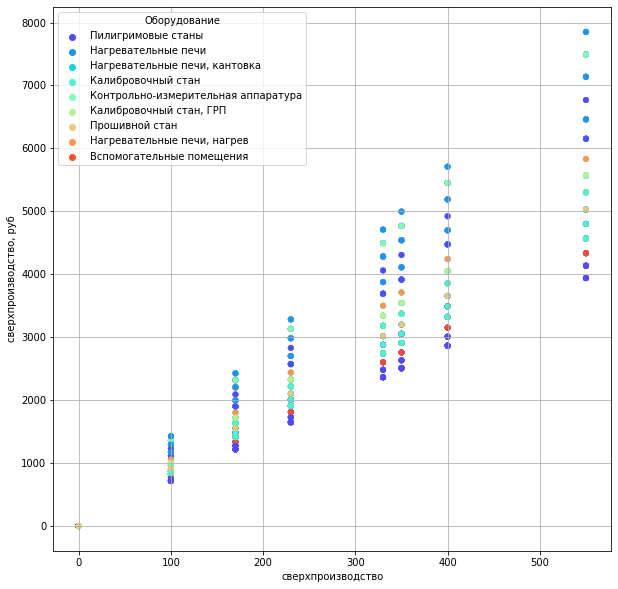

In [31]:
f, ax = plt.subplots(figsize=(10, 10))

plt.grid(True)
sns.scatterplot(x="сверхпроизводство", y="сверхпроизводство, руб",
                      hue="Оборудование",
                palette="rainbow",
                linewidth=0,
                data=df, ax=ax);

__Доверим искусственному интеллекту поиск данного коэффициента, на основе уже полученных данных__

In [32]:
df['сверхпроизводство_без_коэффа'] = df['оклад_бонус'] * df['сверхпроизводство'] 

In [33]:
X = df.filter(['Оклад', 'личный_бонус_руб', 'сверхпроизводство_без_коэффа', 'Вредность (балл.)'], axis=1)
y = df['Доход']

In [34]:
clf = LinearRegression()

In [35]:
clf.fit(X, y)

LinearRegression()

In [36]:
clf.score(X, y)

1.0

In [37]:
pd.DataFrame({'features' : X.columns,
              'feature_importances' : clf.coef_}).sort_values(by='feature_importances',
                                                                            ascending=False).head(20)

,features,feature_importances
3,Вредность (балл.),180.000000
0,Оклад,1.000000
1,личный_бонус_руб,1.000000
2,сверхпроизводство_без_коэффа,0.000588


__Посчитаем доход по нашей формуле и проверим нашу формулу на работоспосность__

Итоговая формула

In [44]:
df['Доход_форм'] = df['Оклад'] + df['Оклад'] * df['личный_бонус'] + (df['Оклад'] + df['Оклад'] * df['личный_бонус'])\
* df['сверхпроизводство'] * 0.000588 + df['Вредность (балл.)'] * 180

In [ ]:
df[(df['доход_без_разряда_и_вредности'] > 12181) & (df['Месяц'] == '2009-01-01')]

In [57]:
df[(df['Доход'] - df['Доход_форм'] < -10) & (df['Доход'] - df['Доход_форм'] > 10)]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад,доход_за_разряд,...,коэф_вредности,доход_без_разряда_и_вредности,сверхпроизводство,личный_бонус,личный_бонус_руб,оклад_бонус,оклад_бонус_вредность,"сверхпроизводство, руб",сверхпроизводство_без_коэффа,Доход_форм


In [54]:
df.filter(['FIO', 'Месяц', 'Профессия', 'Разряд', 'Оборудование', 'Вредность (балл.)', 'Объем производства',
           'Доход', 'Оклад', 'личный_бонус', 'сверхпроизводство', 'Доход_форм'])

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад,личный_бонус,сверхпроизводство,Доход_форм
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180,0.1,0,16638.00000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180,0.1,0,16638.00000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180,0.1,0,16638.00000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180,0.1,350,19395.30840
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180,0.1,400,19789.20960
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,14130,0.1,330,21798.96372
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,14130,0.1,230,20885.03532
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,14130,0.1,0,18783.00000
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,14130,0.1,170,20336.67828
